In [5]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
# Remove the following line:
# yf.pdr_override()
import pandas_datareader.data as web
# Explicitly use yfinance as the data source for pandas_datareader
web.get_data_yahoo = yf.download

In [8]:
tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA"]

carteira = web.get_data_yahoo(tickers, period="5y")["Close"]

ibov = web.get_data_yahoo("^BVSP", period="5y")["Close"]


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
carteira

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-02-07,13.981308,7.509178,7.699082,33.390072,19.142141
2020-02-10,13.824307,7.661827,7.434976,32.165989,19.342409
2020-02-11,13.882150,7.796861,7.939178,33.358036,20.050346
2020-02-12,13.758203,7.849702,7.891160,34.011742,20.753622
2020-02-13,13.444201,7.732280,8.283316,33.415714,21.224018
...,...,...,...,...,...
2025-02-03,11.030000,9.430000,5.530000,54.209999,53.900002
2025-02-04,10.900000,9.450000,5.480000,54.020000,54.060001
2025-02-05,10.820000,9.560000,5.500000,54.310001,54.470001


In [9]:
ibov

Ticker,^BVSP
Date,
2020-02-07,113770.000000
2020-02-10,112570.000000
2020-02-11,115371.000000
2020-02-12,116674.000000
2020-02-13,115662.000000
...,...
2025-02-03,125970.000000
2025-02-04,125147.000000
2025-02-05,125534.000000


<Axes: xlabel='Date'>

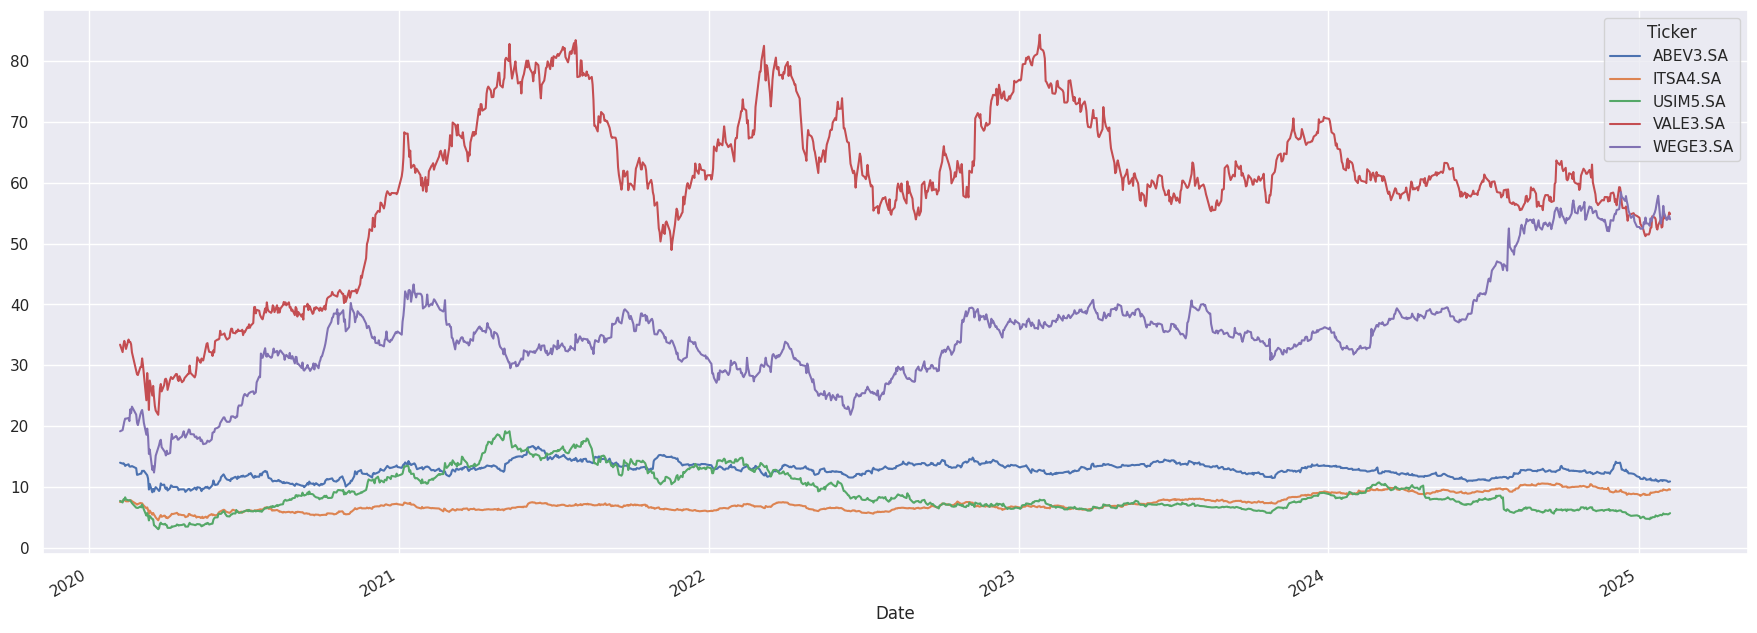

In [11]:
sns.set()
carteira.plot(figsize=(22,8))

In [12]:
carteira_normalizada = (carteira / carteira.iloc[0])
carteira_normalizada

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-02-07,1.000000,1.000000,1.000000,1.000000,1.000000
2020-02-10,0.988771,1.020328,0.965696,0.963340,1.010462
2020-02-11,0.992908,1.038311,1.031185,0.999041,1.047445
2020-02-12,0.984043,1.045348,1.024948,1.018618,1.084185
2020-02-13,0.961584,1.029711,1.075884,1.000768,1.108759
...,...,...,...,...,...
2025-02-03,0.788910,1.255797,0.718267,1.623536,2.815777
2025-02-04,0.779612,1.258460,0.711773,1.617846,2.824136
2025-02-05,0.773890,1.273109,0.714371,1.626531,2.845554


<Axes: xlabel='Date'>

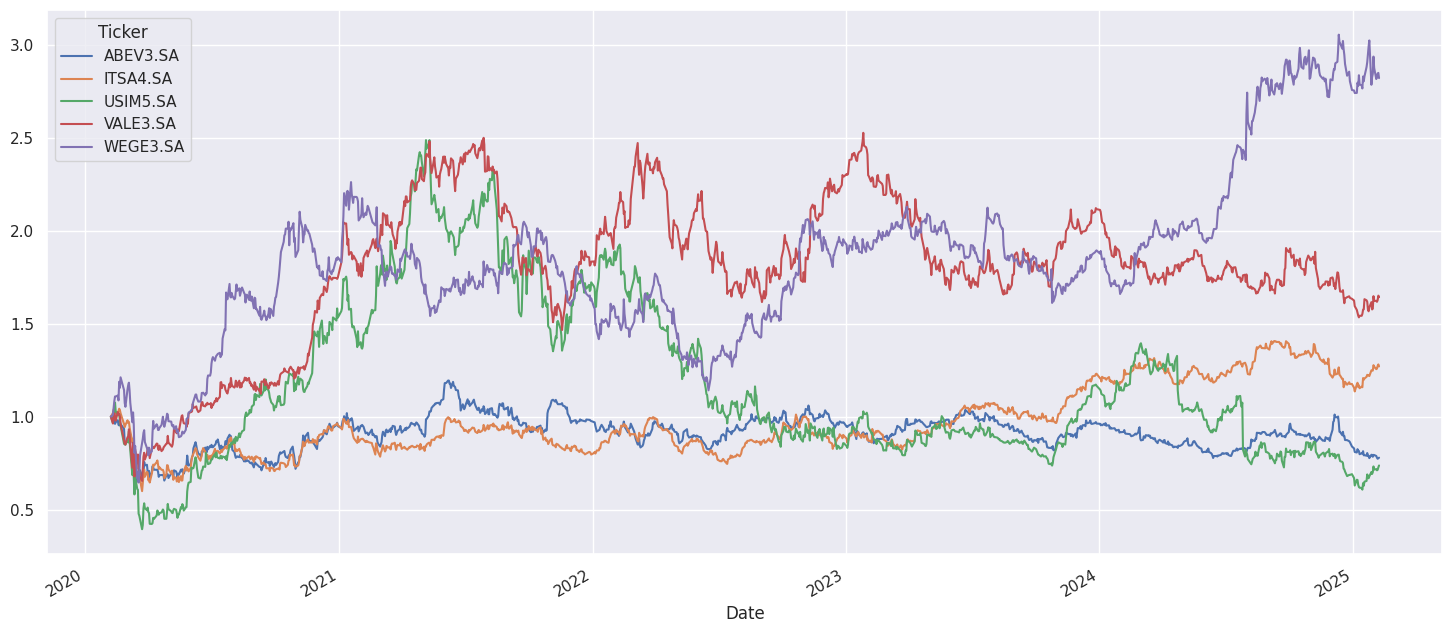

In [13]:
carteira_normalizada.plot(figsize=(18,8))

In [14]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)


In [15]:
carteira_normalizada

Ticker,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2020-02-07,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
2020-02-10,0.988771,1.020328,0.965696,0.963340,1.010462,4.948598
2020-02-11,0.992908,1.038311,1.031185,0.999041,1.047445,5.108890
2020-02-12,0.984043,1.045348,1.024948,1.018618,1.084185,5.157142
2020-02-13,0.961584,1.029711,1.075884,1.000768,1.108759,5.176705
...,...,...,...,...,...,...
2025-02-03,0.788910,1.255797,0.718267,1.623536,2.815777,7.202288
2025-02-04,0.779612,1.258460,0.711773,1.617846,2.824136,7.191827
2025-02-05,0.773890,1.273109,0.714371,1.626531,2.845554,7.233456


In [16]:
ibov_normalizado = (ibov / ibov.iloc[0]*50000)
ibov_normalizado

Ticker,^BVSP
Date,
2020-02-07,50000.000000
2020-02-10,49472.620199
2020-02-11,50703.612552
2020-02-12,51276.259119
2020-02-13,50831.502153
...,...
2025-02-03,55361.694647
2025-02-04,55000.000000
2025-02-05,55170.079986


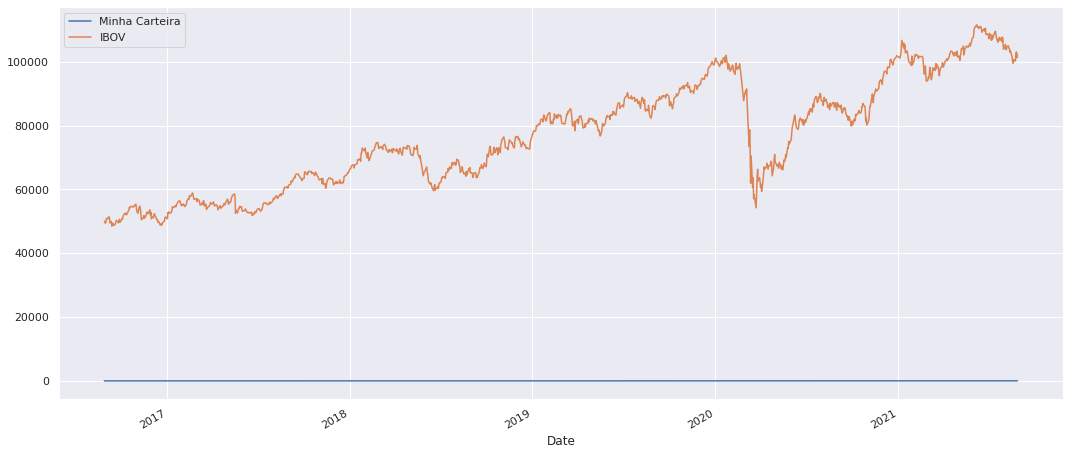

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()